In [ ]:
from IPython.display import clear_output
from selenium import webdriver
import os
import urllib.request
import time
import webbrowser  
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.fftpack import fft
%load_ext autoreload
%autoreload 2
%matplotlib inline
os.chdir('/Users/huerzhen/Downloads')
driver=webdriver.Chrome()
driver.get("https://en.wikipedia.org/wiki/2019%E2%80%9320_coronavirus_pandemic")
driver.execute_script("document.body.style.zoom='80%'")

In [9]:
def rfft_x(file):
    sliding_window=len(file.iloc[0:100,0])
    g_windowf=fft(file.iloc[0:100,0])
    T=0.01
    g_f = 2.0/sliding_window * np.abs(g_windowf[0:sliding_window//2])[0:100]
    xf= np.linspace(0.0, 1.0/(2.0*T), sliding_window//2)[0:100]

    return g_f,xf
def rfft_y(file):
    sliding_window=len(file.iloc[0:100,1])
    g_windowf=fft(file.iloc[0:100,1])
    T=0.01
    g_f = 2.0/sliding_window * np.abs(g_windowf[0:sliding_window//2])[0:100]
    xf= np.linspace(0.0, 1.0/(2.0*T), sliding_window//2)[0:100]
    return g_f,xf
def rfft_z(file):
    sliding_window=len(file.iloc[0:100,2])
    g_windowf=fft(file.iloc[0:100,2])
    T=0.01
    g_f = 2.0/sliding_window * np.abs(g_windowf[0:sliding_window//2])[0:100]
    xf= np.linspace(0.0, 1.0/(2.0*T), sliding_window//2)[0:100]
    return g_f,xf

In [10]:
v=0

In [ ]:
while True:  
    urllib.request.urlopen(clear_dat)
    urllib.request.urlopen(start_dat)
    time.sleep(0.4)
    urllib.request.urlretrieve(save_dat,"/Users/huerzhen/Downloads/realtime_"+str(v)+".xls")
    time.sleep(2)
    file=pd.read_excel("realtime_"+str(v)+".xls",index_col=0)
    fftx=rfft_x(file)
    ax=max(fftx[0])
    ffty=rfft_y(file)
    ay=max(ffty[0])
    fftz=rfft_z(file)
    az=max(fftz[0])
    if ay>max(ax,az) and ay>0.55:
        print("Current status:\nMOVE Away from your screen!")
        driver.execute_script("document.body.style.zoom='200%'")
        x=input("Current status:\nZoom out?(click z)")
        if x=='z':
            driver.execute_script("document.body.style.zoom='100%'")
    elif ax>max(ay,az)and ax>1:
        print("Current status:\nRotation")
        driver.execute_script("document.body.style.zoom='200%'")
        x=input("Current status:\nZoom out?(click z)")
        if x=='z':
            driver.execute_script("document.body.style.zoom='100%'")
    elif ax<0.2 and ay<0.2 and az<0.2:
        print("Current status:\nTyping or\nNot move (Petty action)")
    else:
        print("Current status:\nMoving items")
    clear_output(wait=True)
    v+=1

In [275]:
def rfft_x(file):
    sliding_window=len(file.iloc[0:100,0])
    g_windowf=fft(file.iloc[0:100,0])
    T=0.01
    g_f = 2.0/sliding_window * np.abs(g_windowf[0:sliding_window//2])[0:100]
    xf= np.linspace(0.0, 1.0/(2.0*T), sliding_window//2)[0:100]

    return g_f,xf
def rfft_y(file):
    sliding_window=len(file.iloc[0:100,1])
    g_windowf=fft(file.iloc[0:100,1])
    T=0.01
    g_f = 2.0/sliding_window * np.abs(g_windowf[0:sliding_window//2])[0:100]
    xf= np.linspace(0.0, 1.0/(2.0*T), sliding_window//2)[0:100]
    return g_f,xf
def rfft_z(file):
    sliding_window=len(file.iloc[0:100,2])
    g_windowf=fft(file.iloc[0:100,2])
    T=0.01
    g_f = 2.0/sliding_window * np.abs(g_windowf[0:sliding_window//2])[0:100]
    xf= np.linspace(0.0, 1.0/(2.0*T), sliding_window//2)[0:100]
    return g_f,xf

In [228]:
def fftt_x(file):
    sliding_window=len(file[0].iloc[0:400,0])
    g_windowf=fft(file[0].iloc[0:400,0])
    T=0.01
    g_f = 2.0/sliding_window * np.abs(g_windowf[0:sliding_window//2])[0:100]
    xf= np.linspace(0.0, 1.0/(2.0*T), sliding_window//2)[0:100]

    return g_f,xf
def fftt_y(file):
    sliding_window=len(file[0].iloc[0:400,1])
    g_windowf=fft(file[0].iloc[0:400,1])
    T=0.01
    g_f = 2.0/sliding_window * np.abs(g_windowf[0:sliding_window//2])[0:100]
    xf= np.linspace(0.0, 1.0/(2.0*T), sliding_window//2)[0:100]
    return g_f,xf
def fftt_z(file):
    sliding_window=len(file[0].iloc[0:400,2])
    g_windowf=fft(file[0].iloc[0:400,2])
    T=0.01
    g_f = 2.0/sliding_window * np.abs(g_windowf[0:sliding_window//2])[0:100]
    xf= np.linspace(0.0, 1.0/(2.0*T), sliding_window//2)[0:100]
    return g_f,xf

## Wrist rotation

In [212]:
#gyroscope x
all_files_rotation=[]

In [3]:
IPAddress = '192.168.1.38'  #IP address and port This is different for each person and specified by the phyphox app
num_data = 1 #Take 5 data chunks
pause_tm = 1 #The amount of time to wait in between data collections

save_dat = 'http://' + IPAddress + '/export?format=0'  #Saving data
clear_dat = 'http://' + IPAddress + '/control?cmd=clear'  #Clearing a data collection
start_dat = 'http://' + IPAddress + '/control?cmd=start'  #Starting a data collection

urllib.request.urlopen(clear_dat)
urllib.request.urlopen(start_dat)

In [215]:
for v in range(0,num_data):
    time.sleep(4)
    urllib.request.urlretrieve(save_dat,"/Users/huerzhen/Downloads/file_rotation_"+str(v)+".xls")
    time.sleep(2)
    file=pd.read_excel("file_rotation_"+str(v)+".xls",index_col=0)
    all_files_rotation.append(file)
    #time.sleep(pause_tm) #Wait a bit before collecting data again

urllib.request.urlopen(clear_dat)#Clear the data Collection

In [216]:
len(all_files_rotation[0])

561

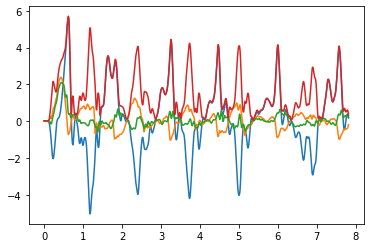

In [112]:
plt.plot(all_files_rotation[2].iloc[:,0:4])
plt.show()
#absolute g can be the metric for detecing wrist rotation.
#typing is most stationary pattern, compared to other activities.

In [24]:
os.getcwd()

'/Users/huerzhen/Downloads'

In [51]:
import pandas as pd
df_m=pd.read_excel("file_moving_4.xls",index_col=0)
df_r=pd.read_excel("file_rotation_2_8.xls",index_col=0)

In [52]:
df_t=pd.read_excel("file_typing_9.xls",index_col=0)
df_a=pd.read_excel("file_approach_9.xls",index_col=0)

Text(0.5, 0, 'Wrist Rotation')

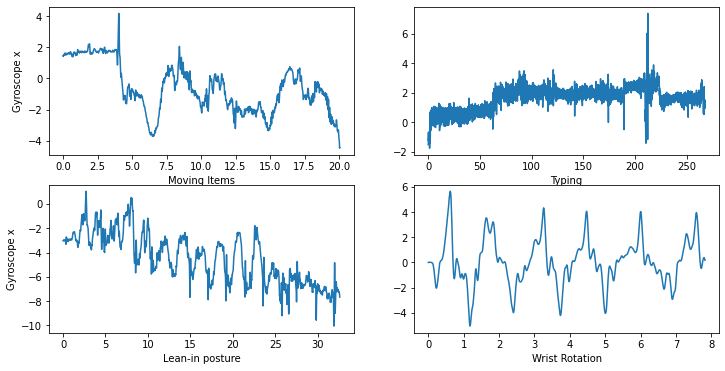

In [67]:
plt.figure(figsize=(12,6))
plt.subplot(2,2,1)
plt.plot(df_m.iloc[:,0])
plt.xlabel("Moving Items")
plt.ylabel("Gyroscope x")
plt.subplot(2,2,2)
plt.plot(df_t.iloc[:,0])
plt.xlabel("Typing")
plt.subplot(2,2,3)
plt.plot(df_a.iloc[:,0])
plt.ylabel("Gyroscope x")
plt.xlabel("Lean-in posture")
plt.subplot(2,2,4)
plt.plot(df_r.iloc[:,0])
plt.xlabel("Wrist Rotation")


Text(0.5, 0, 'Wrist Rotation')

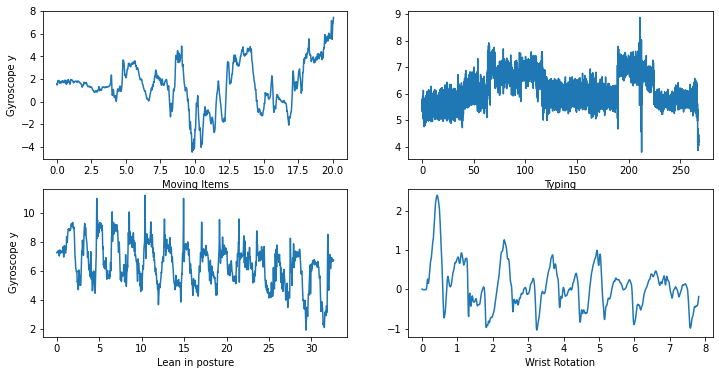

In [68]:
plt.figure(figsize=(12,6))
plt.subplot(2,2,1)
plt.plot(df_m.iloc[:,1])
plt.xlabel("Moving Items")
plt.ylabel("Gyroscope y")
plt.subplot(2,2,2)
plt.plot(df_t.iloc[:,1])
plt.xlabel("Typing")

plt.subplot(2,2,3)
plt.plot(df_a.iloc[:,1])
plt.xlabel("Lean in posture")
plt.ylabel("Gyroscope y")
plt.subplot(2,2,4)
plt.plot(df_r.iloc[:,1])
plt.xlabel("Wrist Rotation")


Text(0.5, 0, 'Wrist Rotation')

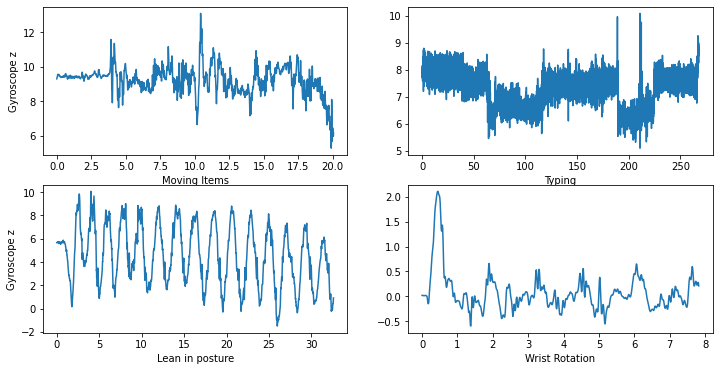

In [69]:
plt.figure(figsize=(12,6))
plt.subplot(2,2,1)
plt.plot(df_m.iloc[:,2])
plt.xlabel("Moving Items")
plt.ylabel("Gyroscope z")
plt.subplot(2,2,2)
plt.plot(df_t.iloc[:,2])
plt.xlabel("Typing")
plt.subplot(2,2,3)
plt.plot(df_a.iloc[:,2])
plt.ylabel("Gyroscope z")
plt.xlabel("Lean in posture")
plt.subplot(2,2,4)
plt.plot(df_r.iloc[:,2])
plt.xlabel("Wrist Rotation")



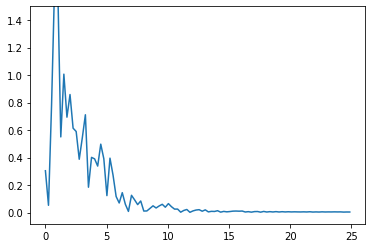

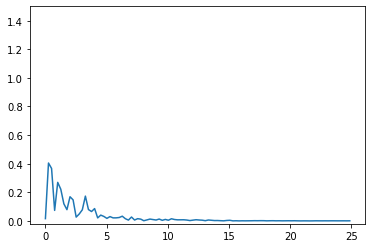

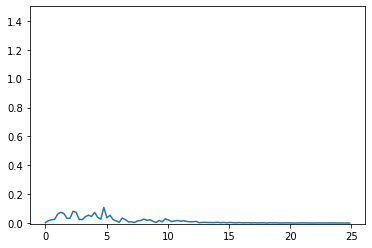

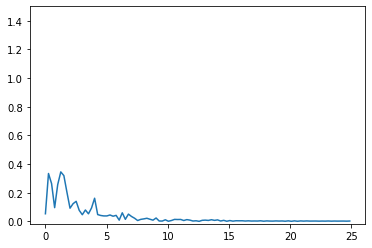

In [235]:
#X
#threshold can be set for "wrist rotations" gestures, as we can observe strong patterns here, compared to other activities
plt.plot(fftt_x(all_files_rotation)[1],fftt_x(all_files_rotation)[0])
plt.ylim(top=1.5)
plt.show()
plt.plot(fftt_x(all_files_approach)[1],fftt_x(all_files_approach)[0])
plt.ylim(top=1.5)
plt.show()
plt.plot(fftt_x(all_files_typing)[1],fftt_x(all_files_typing)[0])
plt.ylim(top=1.5)
plt.show()
plt.plot(fftt_x(all_files_move)[1],fftt_x(all_files_move)[0])
plt.ylim(top=1.5)
plt.show()

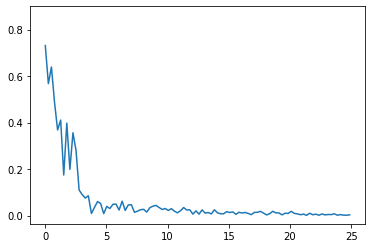

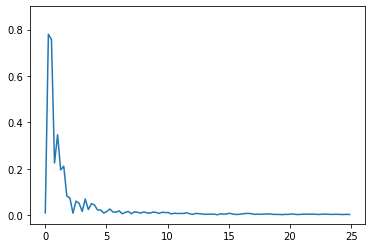

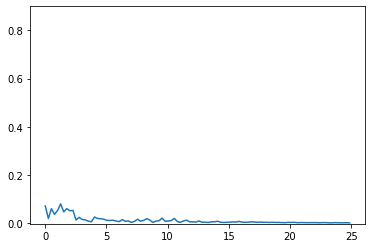

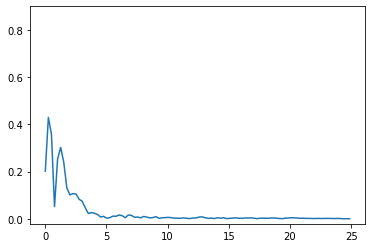

In [236]:
#y
plt.plot(fftt_y(all_files_rotation)[1],fftt_y(all_files_rotation)[0])
plt.ylim(top=0.9)
plt.show()
plt.plot(fftt_y(all_files_approach)[1],fftt_y(all_files_approach)[0])
plt.ylim(top=0.9)
plt.show()
plt.plot(fftt_y(all_files_typing)[1],fftt_y(all_files_typing)[0])
plt.ylim(top=0.9)
plt.show()
plt.plot(fftt_y(all_files_move)[1],fftt_y(all_files_move)[0])
plt.ylim(top=0.9)
plt.show()

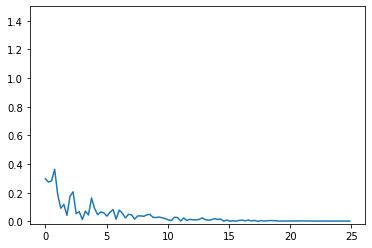

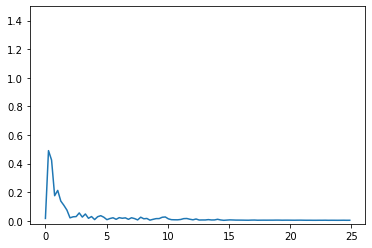

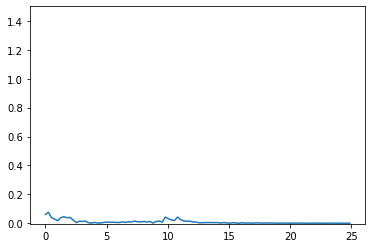

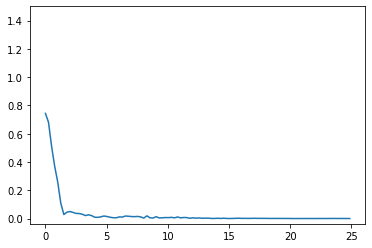

In [237]:
plt.plot(fftt_z(all_files_rotation)[1],fftt_z(all_files_rotation)[0])
plt.ylim(top=1.5)
plt.show()
plt.plot(fftt_z(all_files_approach)[1],fftt_z(all_files_approach)[0])
plt.ylim(top=1.5)
plt.show()
plt.plot(fftt_z(all_files_typing)[1],fftt_z(all_files_typing)[0])
plt.ylim(top=1.5)
plt.show()
plt.plot(fftt_z(all_files_move)[1],fftt_z(all_files_move)[0])
plt.ylim(top=1.5)
plt.show()

### Typing

In [217]:
IPAddress = '192.168.1.38'  #IP address and port This is different for each person and specified by the phyphox app
num_data = 1 #Take 5 data chunks
pause_tm = 1 #The amount of time to wait in between data collections

save_dat = 'http://' + IPAddress + '/export?format=0'  #Saving data
clear_dat = 'http://' + IPAddress + '/control?cmd=clear'  #Clearing a data collection
start_dat = 'http://' + IPAddress + '/control?cmd=start'  #Starting a data collection

all_files_typing=[]
urllib.request.urlopen(clear_dat)
urllib.request.urlopen(start_dat)

In [218]:
for v in range(0,num_data):
    time.sleep(4)
    urllib.request.urlretrieve(save_dat,"/Users/huerzhen/Downloads/file_typing_"+str(v)+".xls")
    time.sleep(2)
    file=pd.read_excel("file_typing_"+str(v)+".xls",index_col=0)
    all_files_typing.append(file)
    #time.sleep(pause_tm) #Wait a bit before collecting data again
#re
urllib.request.urlopen(clear_dat)  #Clear the data Collection


In [219]:
len(all_files_typing[0])

400

## Moving items

In [232]:
all_files_move=[]
#re
urllib.request.urlopen(clear_dat)
urllib.request.urlopen(start_dat)

In [233]:
for v in range(0,num_data):
    time.sleep(4)
    urllib.request.urlretrieve(save_dat,"/Users/huerzhen/Downloads/file_moving_"+str(v)+".xls")
    time.sleep(2)
    file=pd.read_excel("file_moving_"+str(v)+".xls",index_col=0)
    all_files_move.append(file)
    #time.sleep(pause_tm)
     #Wait a bit before collecting data again
#re
urllib.request.urlopen(clear_dat)  #Clear the data Collection

In [234]:
len(all_files_move[0])

653

## Approaching signal data 

In [224]:
all_files_approach = []
urllib.request.urlopen(clear_dat)
urllib.request.urlopen(start_dat)

In [225]:
for v in range(0,num_data):
    time.sleep(4)
    urllib.request.urlretrieve(save_dat,"/Users/huerzhen/Downloads/file_approach_"+str(v)+".xls")
    time.sleep(2)
    file=pd.read_excel("file_approach_"+str(v)+".xls",index_col=0)
    all_files_approach.append(file)
    #time.sleep(pause_tm) #Wait a bit before collecting data again
#re
urllib.request.urlopen(clear_dat)  #Clear the data Collection

In [226]:
len(all_files_approach[0])

633

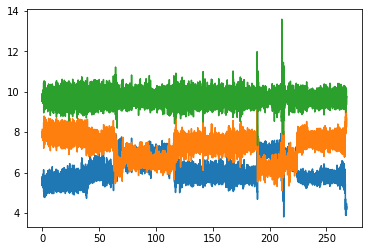

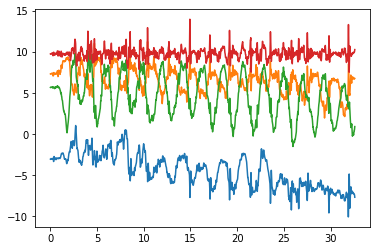

8.886869659423828

In [188]:
#achieve the signal from typing and moving items, we can see obvious difference in pattern.
plt.plot(all_files_typing[9].iloc[:,1:5])

plt.show()
#plt.plot(all_files_move[4].iloc[:,1:5])
#plt.show()
plt.plot(all_files_approach[9])
plt.show()
max(all_files_typing[9].iloc[:,1])

In [71]:
from scipy.fftpack import fft

In [10]:
def fftt(file):
    sliding_window=len(file[4].iloc[:,2])
    g_windowf=fft(file[4].iloc[:,2])
    T=0.01
    g_f = 2.0/sliding_window * np.abs(g_windowf[0:sliding_window//2])[0:100]
    xf= np.linspace(0.0, 1.0/(2.0*T), sliding_window//2)[0:100]
    return g_f,xf

In [166]:
read_

IndexError: list index out of range

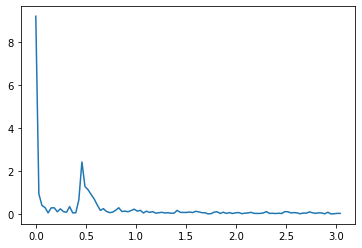

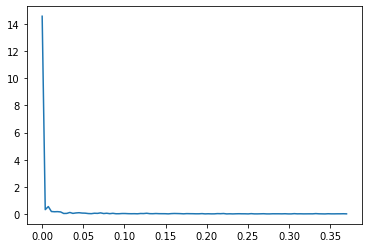

In [192]:
plt.plot(fftt(all_files_approach)[1],fftt(all_files_approach)[0])
plt.show()
plt.plot(fftt(all_files_typing)[1],fftt(all_files_typing)[0])
plt.show()
#plt.plot(fftt(all_files_move)[4][1],fftt(all_files_move)[0])
#plt.show()

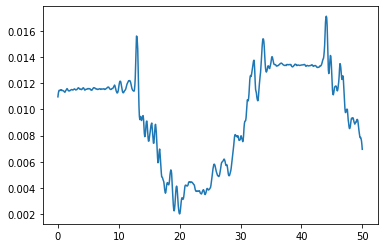

In [93]:
plt.plot(fftt(all_files_typing)[1],fftt(all_files_typing)[0])
plt.show()